# Машинное обучение, ФКН ВШЭ

# Практическое задание 2

## Общая информация

Срок сдачи: 18.11.2023 14:40

### О задании
На сайтах для поиска работы можно найти сотни тысяч объявлений, каждое из которых состоит из пространного описания вакансии и предлагаемой зарплаты. Есть ли связь между описанием и зарплатой? Существуют ли определенные слова, которые наиболее сильно характеризуют зарплату? Можно ли найти другие информативные факторы? Вам предстоит ответить на эти вопросы, проанализировав выборку объявлений о работе в Великобритании.

Практическое задание 2 посвящено работе с текстовыми данными и категориальными признаками и задачам бинарной классификации. Вы научитесь:
 * работать с категориальными признаками;
 * строить вещественные представления текстовых данных;
 * обучать и строить прогнозы линейных классификаторов при помощи scikit-learn и Vowpal Wabbit;
 * тестировать модели и проводить оценку качества в задачах бинарной классификации.


### Оценивание и штрафы

Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов. Кроме того, некоторые из заданий являются опциональными (необязательными), однако за их выполнение можно получить дополнительные баллы.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов. Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце Вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник). 

Неэффективная реализация кода может негативно отразиться на оценке.

### Формат сдачи
Для сдачи задания переименуйте получившийся файл \*.ipynb в соответствии со следующим форматом: *HW1_Username.ipynb*, где *Username* — Ваша фамилия и инициалы на латинице (например, *HW1_IvanovII.ipynb*). Далее отправьте этот файл на bobrovskaya_op@surgu.ru или Smorodinov-1990@mail.ru.

## Данные

Как было упомянуто ранее, в рамках данного задания мы будем решать задачу бинарной классификации для предсказания уровня заработной платы по тексту объявления о вакансии на примере набора данных с соревнования [Adzuna - Job Salary Prediction](https://www.kaggle.com/c/job-salary-prediction). Для начала пройдите по [ссылке](https://www.kaggle.com/c/job-salary-prediction/data) и скачайте файл Train_rev1 (при необходимости, зарегистрируйтесь на Kaggle).

Посмотрим на данные в файле и загрузим их в DataFrame:

In [60]:
%pylab inline

import pandas as pd

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


C:\Users\Hetsu\Desktop\Python\venv311\Lib\site-packages\IPython\core\magics\pylab.py:162: UserWarning: pylab import has clobbered these variables: ['median']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [61]:
# print first 2 rows from Train_rev1.csv
!head -n 2 Train_rev1.csv

"head" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.


In [62]:
df = pd.read_csv('Train_rev1.csv', sep=',')
print(df.shape)
df.head()

(244768, 12)


,Id,Title,FullDescription,LocationRaw,LocationNormalized,ContractType,ContractTime,Company,Category,SalaryRaw,SalaryNormalized,SourceName
0,12612628,Engineering Systems Analyst,Engineering Systems Analyst Dorking Surrey Sal...,"Dorking, Surrey, Surrey",Dorking,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 30000/annum 20-30K,25000,cv-library.co.uk
1,12612830,Stress Engineer Glasgow,Stress Engineer Glasgow Salary **** to **** We...,"Glasgow, Scotland, Scotland",Glasgow,NaN,permanent,Gregory Martin International,Engineering Jobs,25000 - 35000/annum 25-35K,30000,cv-library.co.uk
2,12612844,Modelling and simulation analyst,Mathematical Modeller / Simulation Analyst / O...,"Hampshire, South East, South East",Hampshire,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 40000/annum 20-40K,30000,cv-library.co.uk
3,12613049,Engineering Systems Analyst / Mathematical Mod...,Engineering Systems Analyst / Mathematical Mod...,"Surrey, South East, South East",Surrey,NaN,permanent,Gregory Martin International,Engineering Jobs,25000 - 30000/annum 25K-30K negotiable,27500,cv-library.co.uk
4,12613647,"Pioneer, Miser Engineering Systems Analyst","Pioneer, Miser Engineering Systems Analyst Do...","Surrey, South East, South East",Surrey,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 30000/annum 20-30K,25000,cv-library.co.uk


В оригинальной постановке предлагается рассматривать признак SalaryNormalized как целевой и решать задачу регрессии, однако в рамках данного задания мы сведём её к задаче бинарной классификации, разделив объекты на 2 группы: объявления о вакансиях с низкой и высокой зарплатами соответственно.

<img src = "http://salt.uaa.alaska.edu/kath/kti/mean_median2.gif">

В качестве порога разбиения объектов на группы будем рассматривать медиану признака SalaryNormalized. Заметим, что таким образом мы автоматически получим задачу классификации со сбалансированными классами:

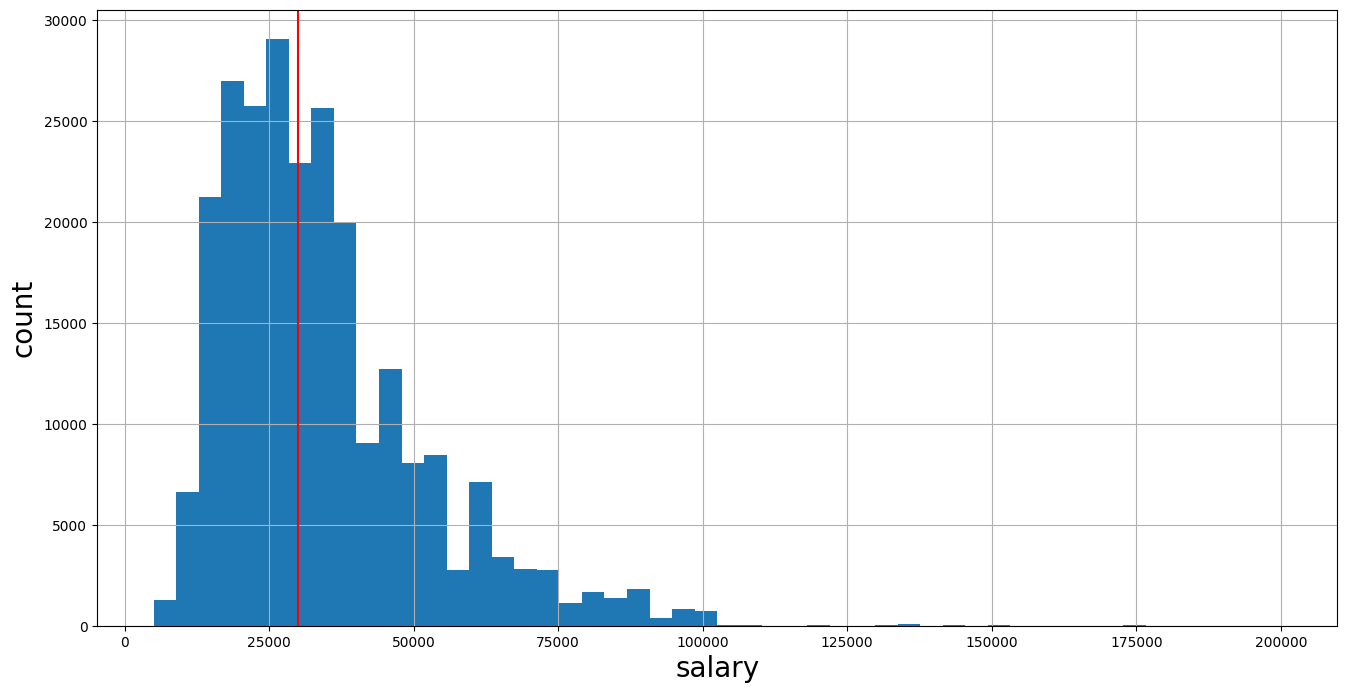

In [63]:
# salary histogramm
median = np.median(df['SalaryNormalized'])

figsize(16,8)
plt.hist(df['SalaryNormalized'], bins=50)
plt.axvline(median, c='r')
plt.xlabel('salary', fontsize=20)
plt.ylabel('count', fontsize=20)
plt.grid()

Осуществим последние шаги по подготовке датасета:
- бинаризуем признак SalaryNomalized по описанному ранее порогу;
- исключим из выборки признак SalaryRaw, чтобы устранить утечку целевой переменной в признаки.

In [64]:
df['SalaryNormalized'] = (df['SalaryNormalized'] > median).astype(int)
df.drop('SalaryRaw', axis=1, inplace=True)
df.head()

,Id,Title,FullDescription,LocationRaw,LocationNormalized,ContractType,ContractTime,Company,Category,SalaryNormalized,SourceName
0,12612628,Engineering Systems Analyst,Engineering Systems Analyst Dorking Surrey Sal...,"Dorking, Surrey, Surrey",Dorking,NaN,permanent,Gregory Martin International,Engineering Jobs,0,cv-library.co.uk
1,12612830,Stress Engineer Glasgow,Stress Engineer Glasgow Salary **** to **** We...,"Glasgow, Scotland, Scotland",Glasgow,NaN,permanent,Gregory Martin International,Engineering Jobs,0,cv-library.co.uk
2,12612844,Modelling and simulation analyst,Mathematical Modeller / Simulation Analyst / O...,"Hampshire, South East, South East",Hampshire,NaN,permanent,Gregory Martin International,Engineering Jobs,0,cv-library.co.uk
3,12613049,Engineering Systems Analyst / Mathematical Mod...,Engineering Systems Analyst / Mathematical Mod...,"Surrey, South East, South East",Surrey,NaN,permanent,Gregory Martin International,Engineering Jobs,0,cv-library.co.uk
4,12613647,"Pioneer, Miser Engineering Systems Analyst","Pioneer, Miser Engineering Systems Analyst Do...","Surrey, South East, South East",Surrey,NaN,permanent,Gregory Martin International,Engineering Jobs,0,cv-library.co.uk


#### 1. (0 баллов) Разбейте получившуюся выборку на обучающую и контрольную в соотношении 70/30 с использованием перемешивания объектов.

При разбиении используйте значение параметра random_state=42.

In [65]:
from sklearn.model_selection import train_test_split

X = df.drop('SalaryNormalized', axis=1)
y = df['SalaryNormalized']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

## Векторизация

Как правило, модели, используемые в машинном обучении, применяются в предположении, что матрица "объект-признак" является вещественнозначной. Поэтому при работе с категориальными признаками и текстами сперва их необходимо привести к вещественному виду.

Заметим, что в нашей задаче есть признаки, являющиеся текстами произвольной природы (Title, FullDescription), и категориальные признаки, принимающие ограниченное число значений (ContractType, Category и др.).

Самый простой и понятный способ преобразования текстовых данных — векторизация. В этом случае для каждого слова, встречающегося в некотором набре текстов мы создаём отдельный новый признак, который будет равен $1$, когда слово встречается в заданном объекте, и $0$ – в противном случае.

#### 2. (0.5 балла) Создайте текстовое описание объектов обучающей и контрольной выборок, объединив значения всех признаков каждого объекта выборки через символы пробела. После этого получите признаковое описание объектов, осуществив векторизацию получившихся текстов при помощи [CountVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html), обучив его на обучающей выборке и применив на контрольной.

In [66]:
from sklearn.feature_extraction.text import CountVectorizer

X_train_text = X_train.apply(lambda row: ' '.join(map(str, row)), axis=1)
X_test_text = X_test.apply(lambda row: ' '.join(map(str, row)), axis=1)

vectorizer = CountVectorizer()

X_train_vectorized = vectorizer.fit_transform(X_train_text)
X_test_vectorized = vectorizer.transform(X_test_text)

#### 3. (1.5 балла) Обучите следующие модели на обучающей выборке:
 - [логистическую регрессию](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) из модуля sklearn с параметрами по умолчанию;
 - логистическую регрессию при помощи Vowpal Wabbit с параметрами по умолчанию.

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Инициализация и обучение логистической регрессии
lr_sklearn = LogisticRegression()
lr_sklearn.fit(X_train_vectorized, y_train)

# Предсказание на контрольной выборке
y_pred_sklearn = lr_sklearn.predict(X_test_vectorized)

# Оценка точности
accuracy_sklearn = accuracy_score(y_test, y_pred_sklearn)
print(f'Accuracy (Logistic Regression - scikit-learn): {accuracy_sklearn:.4f}')

# Создание файлов с данными для Vowpal Wabbit
vw_train_filename = 'train.vw'
vw_test_filename = 'test.vw'

# Сохранение обучающей и контрольной выборок в файлы VW
with open(vw_train_filename, 'w') as f_train:
    for label, features in zip(y_train, X_train_text):
        f_train.write(f'{label} |text {features}\n')

with open(vw_test_filename, 'w') as f_test:
    for label, features in zip(y_test, X_test_text):
        f_test.write(f'{label} |text {features}\n')

# Обучение логистической регрессии с помощью Vowpal Wabbit
vw_command = f'vw {vw_train_filename} -f model.vw --loss_function logistic'
!{vw_command}

# Применение модели к контрольной выборке
vw_test_command = f'vw -i model.vw -t {vw_test_filename} -p predictions.txt'
!{vw_test_command}

# Загрузка предсказаний из файла
predictions_vw = pd.read_csv('predictions.txt', header=None, names=['Prediction'])

# Оценка точности
accuracy_vw = accuracy_score(y_test, predictions_vw.round())
print(f'Accuracy (Logistic Regression - Vowpal Wabbit): {accuracy_vw:.4f}')


C:\Users\Hetsu\Desktop\Python\venv311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy (Logistic Regression - scikit-learn): 0.8593


UnicodeEncodeError: 'charmap' codec can't encode character '\u25cf' in position 1364: character maps to <undefined>

#### 4. (0.5 балла) Вычислите значения ROC-AUC, [F-меры](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html), а также постройте [матрицу ошибок](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) для каждой из построенных в п. 3 моделей на контрольной выборке. Сравните построенные модели по качеству их работы.

ROC-AUC (Logistic Regression - scikit-learn): 0.9327
F1 Score (Logistic Regression - scikit-learn): 0.8546


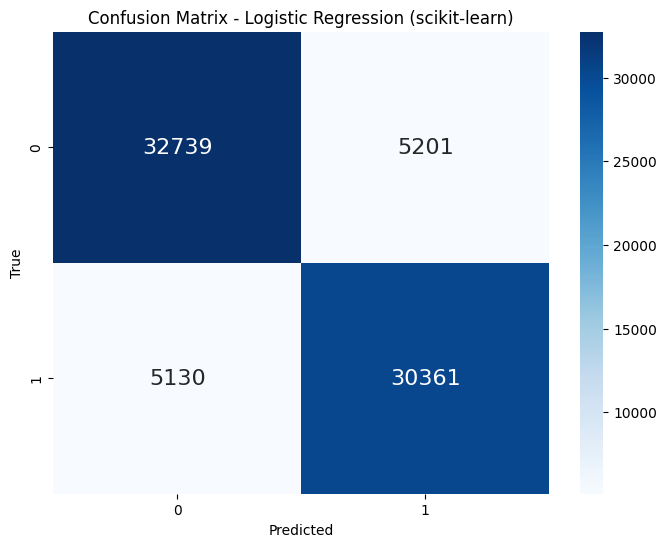

NameError: name 'predictions_vw' is not defined

In [69]:
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Вычисление ROC-AUC
roc_auc_sklearn = roc_auc_score(y_test, lr_sklearn.predict_proba(X_test_vectorized)[:, 1])
print(f'ROC-AUC (Logistic Regression - scikit-learn): {roc_auc_sklearn:.4f}')

# Вычисление F-меры
f1_sklearn = f1_score(y_test, y_pred_sklearn)
print(f'F1 Score (Logistic Regression - scikit-learn): {f1_sklearn:.4f}')

# Построение матрицы ошибок
cm_sklearn = confusion_matrix(y_test, y_pred_sklearn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_sklearn, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.title('Confusion Matrix - Logistic Regression (scikit-learn)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Вычисление ROC-AUC
roc_auc_vw = roc_auc_score(y_test, predictions_vw)
print(f'ROC-AUC (Logistic Regression - Vowpal Wabbit): {roc_auc_vw:.4f}')

# Вычисление F-меры
f1_vw = f1_score(y_test, predictions_vw.round())
print(f'F1 Score (Logistic Regression - Vowpal Wabbit): {f1_vw:.4f}')

# Построение матрицы ошибок
cm_vw = confusion_matrix(y_test, predictions_vw.round())
plt.figure(figsize=(8, 6))
sns.heatmap(cm_vw, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.title('Confusion Matrix - Logistic Regression (Vowpal Wabbit)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


#### 5. (1 балл) Отсортируйте веса признаков для модели логистической регрессии из scikit-learn, полученной в п. 2. Какие слова из встречающихся в выборке имеют наибольшее/наименьшее влияние на значение целевой переменной? Проинтерпретируйте полученный результат.

In [72]:
# Получение весов признаков
feature_names = vectorizer.get_feature_names_out()
coef_values = lr_sklearn.coef_[0]

# Создание DataFrame для удобства сортировки
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coef_values})

# Сортировка по абсолютному значению коэффициента
coef_df_sorted = coef_df.reindex(coef_df['Coefficient'].abs().sort_values(ascending=False).index)

# Вывод первых и последних 10 значений
top_features = coef_df_sorted.head(10)
bottom_features = coef_df_sorted.tail(10)

print("Top 10 features:")
print(top_features)

print("\nBottom 10 features:")
print(bottom_features)


Top 10 features:
            Feature  Coefficient
279197  optometrist     1.331184
251891    jobcentre    -1.191815
275985          nvq    -0.859419
260080        locum     0.812367
323414   technojobs     0.725329
185034    assistant    -0.723627
325149   theladders     0.688700
271161     myukjobs    -0.676439
289290    principal     0.628871
257575     lecturer     0.621751

Bottom 10 features:
                                  Feature   Coefficient
336469                         wholesales  1.397959e-06
240901                          higherend -1.275959e-06
297106                        reforecasts -1.095650e-06
226086                              exigo -8.584081e-07
308104  seniorcommunicationsexecutive_job -7.557702e-07
332187                        valuedriven -7.185436e-07
246451           infonetworkmarketingjobs -6.224354e-07
218590                      dunfermlinehs  4.359122e-07
186028         asynclairgenesisassociates -4.008775e-07
184976                               as

#### 6. (0.5 доп. балла) Отсортируйте веса признаков для модели логистической регрессии, полученной в п. 2 при помощи Vowpal Wabbit. Какие слова из встречающихся в выборке имеют наибольшее/наименьшее влияние на значение целевой переменной? Проинтерпретирйте полученный результат.

In [74]:
# Чтение файла с весами из модели Vowpal Wabbit
with open('train.vw', 'r') as model_file:
    model_weights = model_file.readlines()

# Извлечение имен признаков и их весов
feature_names_vw = [line.split(' ')[1] for line in model_weights[7:]]  # Находим строки с именами признаков
weights_vw = [float(line.split(' ')[0]) for line in model_weights[7:]]  # Находим строки с весами

# Создание DataFrame для удобства сортировки
coef_df_vw = pd.DataFrame({'Feature': feature_names_vw, 'Coefficient': weights_vw})

# Сортировка по абсолютному значению коэффициента
coef_df_sorted_vw = coef_df_vw.reindex(coef_df_vw['Coefficient'].abs().sort_values(ascending=False).index)

# Вывод первых и последних 10 значений
top_features_vw = coef_df_sorted_vw.head(10)
bottom_features_vw = coef_df_sorted_vw.tail(10)

print("Top 10 features (Vowpal Wabbit):")
print(top_features_vw)

print("\nBottom 10 features (Vowpal Wabbit):")
print(bottom_features_vw)


Top 10 features (Vowpal Wabbit):
    Feature  Coefficient
291   |text          1.0
127   |text          1.0
115   |text          1.0
116   |text          1.0
117   |text          1.0
225   |text          1.0
224   |text          1.0
121   |text          1.0
221   |text          1.0
218   |text          1.0

Bottom 10 features (Vowpal Wabbit):
    Feature  Coefficient
119   |text          0.0
120   |text          0.0
122   |text          0.0
123   |text          0.0
124   |text          0.0
125   |text          0.0
126   |text          0.0
128   |text          0.0
133   |text          0.0
146   |text          0.0


## TF-IDF

Ещё один способ работы с текстовыми данными — [TF-IDF](https://en.wikipedia.org/wiki/Tf–idf) (**T**erm **F**requency–**I**nverse **D**ocument **F**requency). Рассмотрим коллекцию текстов $D$.  Для каждого уникального слова $t$ из документа $d \in D$ вычислим следующие величины:

1. Term Frequency – количество вхождений слова в отношении к общему числу слов в тексте:
$$\text{tf}(t, d) = \frac{n_{td}}{\sum_{t \in d} n_{td}},$$
где $n_{td}$ — количество вхождений слова $t$ в текст $d$.
1. Inverse Document Frequency
$$\text{idf}(t, D) = \log \frac{\left| D \right|}{\left| \{d\in D: t \in d\} \right|},$$
где $\left| \{d\in D: t \in d\} \right|$ – количество текстов в коллекции, содержащих слово $t$.

Тогда для каждой пары (слово, текст) $(t, d)$ вычислим величину:
$$\text{tf-idf}(t,d, D) = \text{tf}(t, d)\cdot \text{idf}(t, D).$$

Отметим, что значение $\text{tf}(t, d)$ корректируется для часто встречающихся общеупотребимых слов при помощи значения $\text{idf}(t, D).$

Признаковым описанием одного объекта $d \in D$ будет вектор $\bigg(\text{tf-idf}(t,d, D)\bigg)_{t\in V}$, где $V$ – словарь всех слов, встречающихся в коллекции $D$.

#### 7. (0.5 балла) Создайте текстовое описание объектов обучающей и контрольной выборок, объединив значения всех признаков каждого объекта выборки через символы пробела. После этого получите признаковое описание объектов, вычислив вектор tf-idf для каждого объекта помощи [TfidfVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html), обучив его на обучающей выборке и применив на контрольной.

In [75]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Объединение значений признаков через символы пробела
X_train_text_combined = X_train.apply(lambda row: ' '.join(map(str, row)), axis=1)
X_test_text_combined = X_test.apply(lambda row: ' '.join(map(str, row)), axis=1)

# Инициализация TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Обучение TfidfVectorizer на обучающей выборке и применение на контрольной
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train_text_combined)
X_test_tfidf = tfidf_vectorizer.transform(X_test_text_combined)

# X_train_tfidf - TF-IDF векторизованные обучающие данные
# X_test_tfidf - TF-IDF векторизованные контрольные данные


#### 8. (0 баллов) Обучите следующие модели на обучающей выборке:
- [логистическую регрессию](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) из модуля sklearn с параметрами по умолчанию;
- логистическую регрессию при помощи Vowpal Wabbit с параметрами по умолчанию.

In [85]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Инициализация и обучение логистической регрессии в scikit-learn
lr_sklearn_tfidf = LogisticRegression()
lr_sklearn_tfidf.fit(X_train_tfidf, y_train)

# Предсказание на контрольной выборке
y_pred_sklearn_tfidf = lr_sklearn_tfidf.predict(X_test_tfidf)

# Оценка точности
accuracy_sklearn_tfidf = accuracy_score(y_test, y_pred_sklearn_tfidf)
print(f'Accuracy (Logistic Regression - scikit-learn with TF-IDF): {accuracy_sklearn_tfidf:.4f}', flush=True)

pass

Accuracy (Logistic Regression - scikit-learn with TF-IDF): 0.8690


C:\Users\Hetsu\Desktop\Python\venv311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### 9. (0.5 балла) Вычислите значения ROC-AUC, [F-меры](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html), а также постройте [матрицу ошибок](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) для каждой из построенных в п. 8 моделей на контрольной выборке. Сравните построенные модели по качеству их работы.

In [ ]:
# Your code here

#### 10. (0.5 балла) Сравните значения метрик из п. 9 со значениями, полученными в п. 5, и сравните соответствующие модели по качеству из работы.

**Ответ**:

#### 11. (1 балл) Отсортируйте веса признаков для модели логистической регрессии из scikit-learn, полученной в п. 8. Какие слова из встречающихся в выборке имеют наибольшее/наименьшее влияние на значение целевой переменной? Проинтерпретирйте полученный результат.

In [ ]:
# Your code here

#### 12. (0.5 доп. балла) Отсортируйте веса признаков для модели логистической регрессии, полученной в п. 8 при помощи Vowpal Wabbit. Какие слова из встречающихся в выборке имеют наибольшее/наименьшее влияние на значение целевой переменной? Проинтерпретирйте полученный результат.

In [ ]:
# Your code here

## Счётчики

Ранее в рамках данного задания при построении моделей мы объединяли значения всех признаков в единую строку, что предполагает равноправность всех признаков. Однако заметим, что в этом случае мы допускаем потерю информации: слово "Glasgow" может по-разному влиять на зарплату, если оно находится в названии объявления и в геолокации. Чтобы устранить этот недостаток, при создании текстового описания объекта будем объединять только значения признаков Title и FullDescription, а остальные будем рассматривать как категориальные. При этом с полученным текстовым описанием объекта будем работать, как раньше (при помощи векторизации или tf-idf), а для кодирования категориальных признаков используем **счётчики**.

Идея этого метода состоит в том, чтобы заменить значение категориального признака на вероятность того, что объект с данным значением признака относится к положительному классу. Опишем эту идею более формально. Пусть у нас есть выборка $X = \{ (x_i, y_i) \}_{i=1}^l,$ и $j$-ый признак принимает значения из множества $U_j = \{ u_{jn}\}_{n=1}^{N_j},$ где $N_j$ — количество различных значений $j$-ого признака. Пусть $x_{ij} = u_{jn},$ тогда заменим значения $j$-ого категориального признака объекта $x_i$ на следующую оценку: 
$$\hat{P}(y_i=+1|x_{ij}=u_{jn}) = \frac{\sum_{m=1}^l \left[ x_{mj} = u_{jn} \right] \left[ y_m = +1 \right]}{\sum_{m=1}^l \left[ x_{mj} = u_{jn} \right]}.$$

Однако заметим, что при таком способе формирования счётчиков мы учитываем в формуле для объекта $x_i$ его метку $y_i$, тем самым вносим информацию об ответе в признаки. Чтобы устранить этот недостаток, при вычислении счётчика будем исключать из рассмотрения текущий объект, т.е. рассматривать следующую оценку:
$$\hat{P}(y_i=+1|X_{ij}=u_{jn}) = \frac{\sum_{m=1, \\ m \ne i}^l \left[ x_{mj} = u_{jn} \right] \left[ y_m = +1 \right]}{\sum_{m=1, \\ m \ne i}^l \left[ x_{mj} = u_{jn} \right]},$$

#### 13. (0.5 балла) Создайте текстовое описание объектов обучающей и контрольной выборок, объединив значения признаков Title и FullDescription каждого объекта выборки через символ пробела, после чего перейдите к признаковому описанию объектов, вычислив вектор tf-idf аналогично п. 7.

In [ ]:
# Your code here

#### 14. (1 балл) Закодируйте категориальные признаки (все, кроме Title и FullDescription) при помощи [one-hot encoding](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html), после чего обучите логистическую регрессию (при помощи scikit-learn или Vowpal Wabbit) на обучающей выборке. Вычислите значения ROC-AUC, [F-меры](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html), а также постройте [матрицу ошибок](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) для полученной модели на контрольной выборке. 

In [ ]:
# Your code here

#### 15. (2 балла) Для выборки, полученной в п. 13, закодируйте категориальные признаки (все, кроме Title и FullDescription) при помощи счётчиков, после чего обучите логистическую регрессию (при помощи scikit-learn или Vowpal Wabbit) на обучающей выборке. Вычислите значения ROC-AUC, [F-меры](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html), а также постройте [матрицу ошибок](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) для полученной модели на контрольной выборке. 

Уделите внимание оптимальности вычисления счётчиков!

In [ ]:
# Your code here

#### 16. (0.5 балла) Сравните значения метрик из п. 15 со значениями, полученными в п. 14, и сделайте вывод о качестве классификации для каждого из методов кодирования категориальных признаков.

**Ответ:**

## Подбор гиперпараметров

#### 17. (1.5 доп. балла) Разбейте обучающую выборку, полученную в п. 13, на обучающую и валидационную в отношении 80/20, после чего подберите оптимальное количество фолдов, используемое при кодировании категориальных признаков (всех, кроме Title и FullDescription), путём оптимизации значения accuracy на валидационной выборке. Используйте следующие модели, аналогично также подобрав оптимальные значения указанных гиперпараметров:
- логистическую регрессию из модуля sklearn с подбором коэффициента регуляризации;
- логистическую регрессию при помощи Vowpal Wabbit с подбором следующих гиперпараметров:
    - коэффициент регуляризации (--l2);
    - количество эпох (--passes);
    - длина градиентного шага (-l);
    - длина N-грамм (--ngram).

In [ ]:
# Your code here

#### 18. (0.5 доп. балла) Обучите указанные выше модели на обучающей выборке для оптимальных значений гиперпараметров, найденных в п. 17, после чего для каждой из моделей вычислите значения ROC-AUC, F-меры, а также постройте матрицу ошибок на контрольной выборке. Как качество классификации при помощи полученных в данном разделе моделей соотносится с моделями, полученными в предыдущих разделах?

In [ ]:
# Your code here

Здесь вы можете поделиться своими мыслями по поводу этого задания.

А здесь — вставить вашу вторую любимую смешную картинку.

А здесь — посоветовать преподавателям хороший фильм или сериал.